## Project: Investigate No_show_medical_appointment dataset

### Contents
Introduction

Data Wrangling

Exploratory Data Analysis

Conclusion

### Introduction


A patient makes a doctor's appointment, and didn't show up. Why?

The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about patient are included in the data

Original data can be access using this link https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000

#### Data Dictionary

01 - PatientId: Identification of a patient

02 - AppointmentID: Identification of each appointment

03 - Gender: Male or Female

04 - AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.

05 - ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.

06 - Age: How old is the patient.

07 - Neighbourhood: Where the appointment takes place.

08 - Scholarship: 1 or 0 .This indicates whether or not the patient is enrolled in Brasillian Welfare program Bolsa Família.

09 - Hipertension: 1 or 0

10 - Diabetes: 1 or 0

11 - Alcoholism: 1 or 0

12 - Handcap: 1 or 0

13 - SMS_received: 1 or more messages sent to the patient.

14 - No-show: Yes or No.

##### Note: 'No' if the patient showed up to their appointment. and 'Yes' if they did not show up

Analyzing this dataset aim to answer the following:

1. How many percentage of patients miss their appointment
2. What age category miss the appointment most and why?
3. Is waiting days a factor for shoing up for appointment?
4. Does SMS received promp patient to show for their appointment?
5. Does patients enrollment in Brasillian Welfare program(i.e scholarship) affect their appointment

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('medical-appointment.csv')

df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


#### Data Wrangling

In [3]:
# checking the general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

In [5]:
# checking for null values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# checking for unique count in each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The data has 110527 rows and 14 columns(13 independent columns and 1 dependent column[No_show])

The data has no null value

Some data columns are not in right datatypes(scheduledDay, AppointmentDay, patientID)

### Data Cleaning

Dropping of AppointmentId and PatientId

Removing duplicated values

Renaming NO-show column to conform to standard naming convention

Changing the scheduledday and appointmentday to datetime types

In [7]:
# dropping patientid and appointmentid columns

df.drop(['AppointmentID', 'PatientId'], axis=1, inplace=True)

In [8]:
# Checking for duplicate values and dropping them

sum(df.duplicated())

635

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# Changing scheduleDay and AppointmentDay datatype to datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [11]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          109892 non-null  object             
 1   ScheduledDay    109892 non-null  datetime64[ns, UTC]
 2   AppointmentDay  109892 non-null  datetime64[ns, UTC]
 3   Age             109892 non-null  int64              
 4   Neighbourhood   109892 non-null  object             
 5   Scholarship     109892 non-null  int64              
 6   Hipertension    109892 non-null  int64              
 7   Diabetes        109892 non-null  int64              
 8   Alcoholism      109892 non-null  int64              
 9   Handcap         109892 non-null  int64              
 10  SMS_received    109892 non-null  int64              
 11  No_show         109892 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.9+ MB


### Exploratory Data Analysis(EDA)

Explore the scheduleDay and AppointmentDay by checking for the start and end

Analyzing if interval days between scheduledDay and AppointmentDay affect the patients show up. This can be done by subtracting scheduledDay from AppointmentDay in days

Exploring the age column by bining and investigating against other columns

Exploring if SMS received has anything to do with showing up or not

check distribution of columns using histogram

In [14]:
print("The scheduling of appointments began on {}".format(df['ScheduledDay'].dt.date.min()))

The scheduling of appointments began on 2015-11-10


In [15]:
print("The scheduling of appointments ended on {}".format(df['ScheduledDay'].dt.date.max()))

The scheduling of appointments ended on 2016-06-08


In [16]:
print("Appointments for visits began on {}".format(df['AppointmentDay'].dt.date.min()))

Appointments for visits began on 2016-04-29


In [17]:
print("Appointments for visits ended on {}".format(df['AppointmentDay'].dt.date.max()))

Appointments for visits ended on 2016-06-08


##### Days between appointment and schedule day

In [18]:
df['waiting_days'] = (df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).dt.days

In [19]:
df.head(4)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,waiting_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0


##### Histogram showing column data distribution

In [20]:
def column_dist():
    distribution = df.hist(figsize=(18,12))
    return distribution

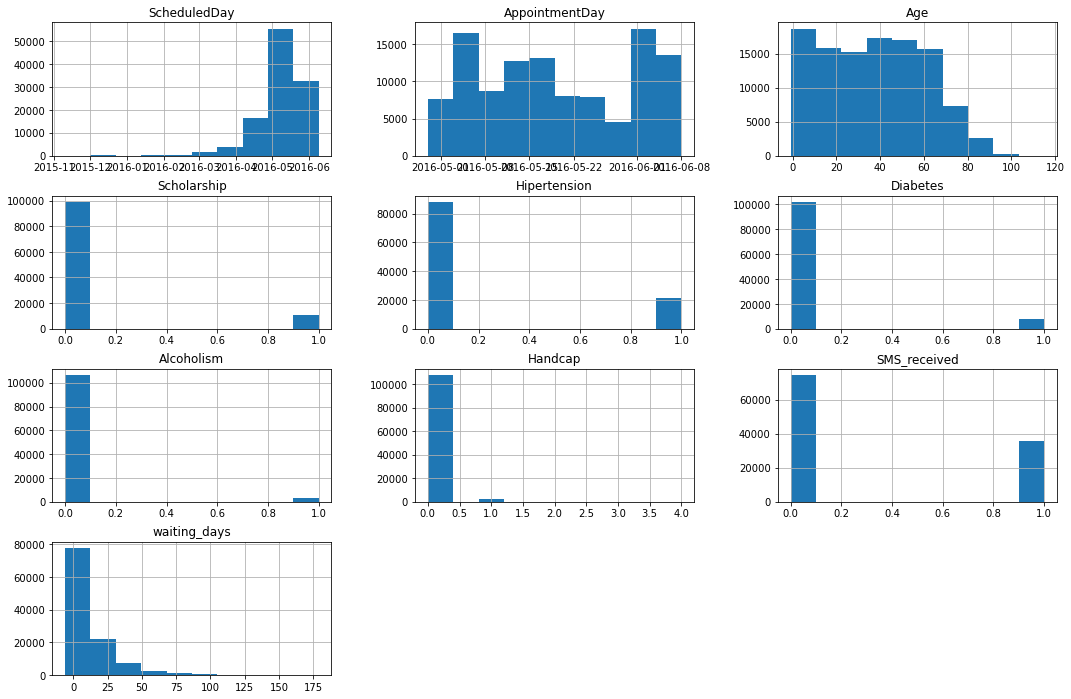

In [21]:
column_dist();

#### Histogram Observation

There are many young people in the dataset,and the age are evenly distributed

ScheduleDay distribution is left-skewed

Most patients are not enrolled in Brasillan welfare program

Most patient are not alcholic but more diabetes and much more hypertensive

Most patients are not Hypertensive

### What age category miss the appointment most and why?

##### Using box plot to show the Age distribution and check is there are outliers

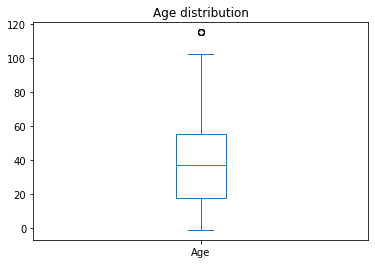

In [22]:
df['Age'].plot(kind='box', title="Age distribution");

#### Boxplot above shows an outlier of age 115, mean age of 37, and most patients aged between 20-55.

##### creating a bin category for age using pandas.cut

In [23]:
df['Age'].describe()

count    109892.000000
mean         37.089506
std          23.121196
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [24]:
df.query('Age<0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,waiting_days
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0


Note: It's not possible for age to be less than 0. So dropping the row will be good

In [25]:
df = df[df['Age'] > 0]  

In [26]:
df['Age'].describe() #Ensuring Age<0 have been dropped

count    106361.000000
mean         38.320822
std          22.475574
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [27]:
age_edges = [1.0, 19.0, 38.0, 56.0, 115.0]

age_names = ['Child','Youth','Adult','Old']

df['Age_category'] = pd.cut(df['Age'], age_edges, labels=age_names)

df.head(4)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,waiting_days,Age_category
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Old
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Adult
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Old
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Child


##### Grouping Age_category based on scholarship

Age_category
Child    0.133123
Youth    0.140304
Adult    0.101234
Old      0.034799
Name: Scholarship, dtype: float64


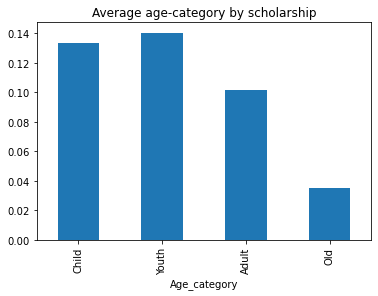

In [28]:
print(df.groupby('Age_category').Scholarship.mean())

df.groupby('Age_category').Scholarship.mean().plot(kind='bar', title="Average age-category by scholarship");

###### Most people that are enrolled in Brasillan welfare program(scholarship) are the youth and children 

#### Analyzing category of people that has hypertension, diabetes and alcohol driven. This can be achieved by grouping the average Age_category based on those factors and visualizing

In [29]:
age_factor = df.groupby('Age_category').mean()[['Hipertension','Diabetes', 'Alcoholism']]

age_factor

,Hipertension,Diabetes,Alcoholism
Age_category,,,
Child,0.001759,0.002249,0.001268
Youth,0.049482,0.014480,0.022328
Adult,0.256972,0.080897,0.063626
Old,0.521050,0.205064,0.039032


Text(0, 0.5, 'Average')

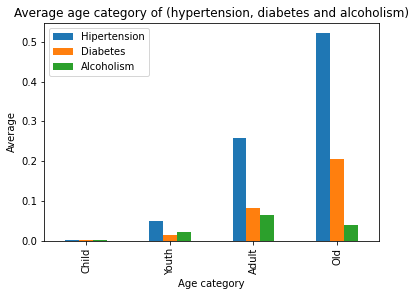

In [30]:
age_factor.plot(kind='bar')
plt.title("Average age category of (hypertension, diabetes and alcoholism)")
plt.xlabel('Age category')
plt.ylabel("Average")

##### Old people has the highest average hypertension and Diabetes while 
##### Adult has the highest average Alcoholism

In [31]:
df['No_show'].value_counts() #unique count of "No_show"

No     84899
Yes    21462
Name: No_show, dtype: int64

<AxesSubplot:title={'center':'Percentage of No_show appointment'}, ylabel='No_show'>

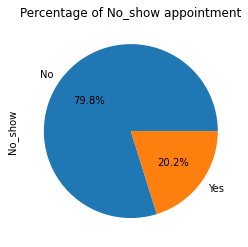

In [32]:
df['No_show'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Percentage of No_show appointment")

In [33]:
# Cross tabulation between No-show and Age_category

crosstab = pd.crosstab(index=df['No_show'], columns=df['Age_category'])
print(crosstab)

Age_category  Child  Youth  Adult    Old
No_show                                 
No            18813  20869  21612  21749
Yes            5638   6272   5138   3999


<AxesSubplot:title={'center':'No_show appointment by age category'}, xlabel='No_show', ylabel='Frequency'>

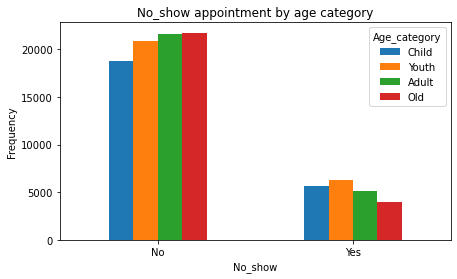

In [34]:
 # Grouped bar chart between No-show and Age_category
    
crosstab.plot.bar(figsize=(7,4), rot=0, title="No_show appointment by age category", ylabel="Frequency")

#### 79.9% of patients show up to the doctor's appointment, while 20.1% did not

#### Among the 20.1% who failed to show up for the appointment, Child and Youth had the highest rate. This may be because hypertension, diabetes, and alcoholism are rare among them
#### Based on 79.9% of patients that showed up, Old, Adult always showed up the most because they often had hypertension, diabetes, and alcoholism. while most youth that show up is as a result of being enrolled in Brasillian Welfare program i.e scholarship

In [35]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,waiting_days,Age_category
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Old
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Adult


### Is waiting days a factor in showing up for a doctor's appointment?

##### statiscal info on waiting_days

In [36]:
df['waiting_days'].describe()

count    106361.000000
mean         10.139882
std          15.259557
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: waiting_days, dtype: float64

In [37]:
df['waiting_days'].max()

179

In [38]:
df.query('waiting_days==179')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,waiting_days,Age_category
102786,M,2015-12-07 10:43:34+00:00,2016-06-03 00:00:00+00:00,67,MARUÍPE,0,1,1,0,0,0,No,179,Old
102788,F,2015-12-07 10:45:01+00:00,2016-06-03 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179,Old
102789,F,2015-12-07 10:44:25+00:00,2016-06-03 00:00:00+00:00,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179,Old
102790,M,2015-12-07 10:44:40+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,0,0,No,179,Old
102791,F,2015-12-07 10:43:50+00:00,2016-06-03 00:00:00+00:00,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179,Old
102792,M,2015-12-07 10:44:07+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,1,0,Yes,179,Old
102795,F,2015-12-07 10:40:59+00:00,2016-06-03 00:00:00+00:00,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,Yes,179,Youth
102796,F,2015-12-07 10:43:01+00:00,2016-06-03 00:00:00+00:00,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179,Old
102797,F,2015-12-07 10:42:42+00:00,2016-06-03 00:00:00+00:00,48,MARUÍPE,0,1,1,0,0,1,No,179,Adult
102799,F,2015-12-07 10:43:17+00:00,2016-06-03 00:00:00+00:00,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179,Old


In [39]:
df.query('waiting_days<0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,waiting_days,Age_category
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1,Youth
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1,Child
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1,Youth
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6,Old
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1,Child


It's not possible for the days between scheduleDay and AppointmentDay to be negative. This is most likely to occur as a result of wrong data entry.

Five patients falls a victim of this.

##### Showing the waiting days distribution by using histogram

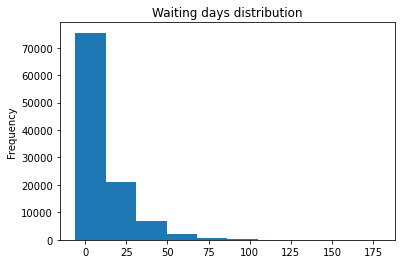

In [40]:
df['waiting_days'].plot(kind='hist', title='Waiting days distribution', 
                        xlabel='waiting days', ylabel='Frequency');

The above distribution shows the waiting_days is skewed to the right.

No_show
No      8.717217
Yes    15.767636
Name: waiting_days, dtype: float64


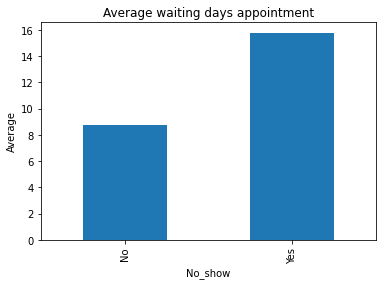

In [41]:
#Average No_show waiting days

print(df.groupby('No_show').waiting_days.mean())

df.groupby('No_show').waiting_days.mean().plot(kind='bar', title="Average waiting days appointment", 
                                               xlabel='No_show', ylabel='Average');

Further analyzing waiting days

In [42]:
df['waiting_days'].median()

4.0

##### Filtering the data based on median

In [43]:
no_waiting_days = df.query('waiting_days==0')

low_waiting_days = df.query('0<waiting_days<4.0')

high_waiting_days = df.query('waiting_days>=4.0')

In [44]:
print("no_waiting_days has shape {}".format(no_waiting_days.shape))
print("Low_waiting_days has shape {}".format(low_waiting_days.shape))
print("high_waiting_days has shape {}".format(high_waiting_days.shape))

no_waiting_days has shape (37072, 14)
Low_waiting_days has shape (14200, 14)
high_waiting_days has shape (55084, 14)


#### visualizing waiting_days based on no_show

No     35346
Yes     1726
Name: No_show, dtype: int64


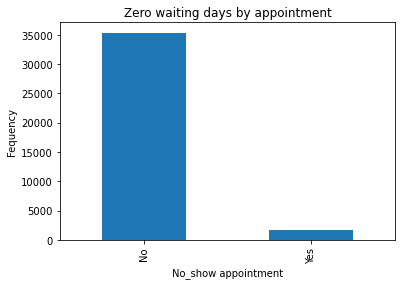

In [45]:
print(no_waiting_days['No_show'].value_counts())

no_waiting_days['No_show'].value_counts().plot(kind='bar', title='Zero waiting days by appointment', 
                                               ylabel='Fequency', xlabel='No_show appointment');

No     10948
Yes     3252
Name: No_show, dtype: int64


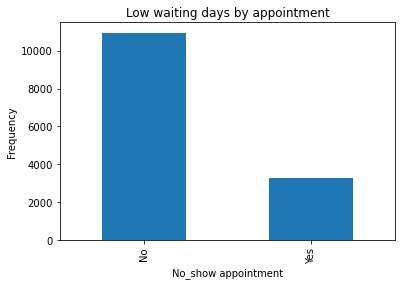

In [46]:
print(low_waiting_days['No_show'].value_counts())

low_waiting_days['No_show'].value_counts().plot(kind='bar', title='Low waiting days by appointment', 
                                                xlabel='No_show appointment', ylabel='Frequency');

No     38605
Yes    16479
Name: No_show, dtype: int64


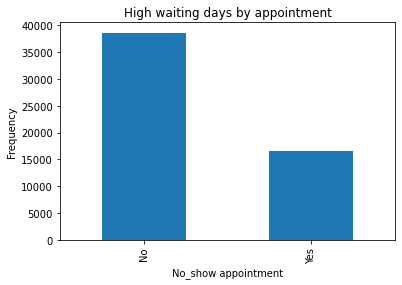

In [47]:
print(high_waiting_days['No_show'].value_counts())

high_waiting_days['No_show'].value_counts().plot(kind='bar', title='High waiting days by appointment', 
                                                 xlabel='No_show appointment', ylabel='Frequency');

#### The majority of patients whose appointment day is the scheduled day showed up. In general, the longer the waiting days, the greater the possibility of patients not showing up

### Does sms_received prompt patients to show for their appointment

In [48]:
df['SMS_received'].describe()

count    106361.000000
mean          0.325166
std           0.468439
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: SMS_received, dtype: float64

0    71776
1    34585
Name: SMS_received, dtype: int64


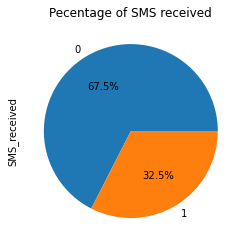

In [49]:
# count of SMS_received
print(df['SMS_received'].value_counts())

df['SMS_received'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Pecentage of SMS received');

##### 32.3%(35,482) of the patients received sms while 67.7%(74,427) did not

#### Further investigating patients that received SMS

In [50]:
sms_yes = df.query('SMS_received==1')

sms_yes.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,waiting_days,Age_category
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3,Youth
15,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No,3,Child


No     25017
Yes     9568
Name: No_show, dtype: int64


<AxesSubplot:title={'center':'Appointment by SMS received'}, xlabel='No_show Appointment', ylabel='Frequency'>

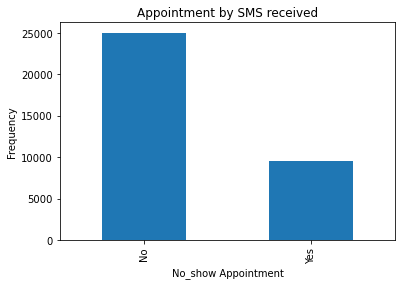

In [51]:
print(sms_yes['No_show'].value_counts())

sms_yes['No_show'].value_counts().plot(kind='bar', title="Appointment by SMS received", ylabel="Frequency", xlabel="No_show Appointment")

##### Out of 35,482 patients that received SMS, 25,698 showed up for the appointment. This implies that sending SMS to patients for reminder will prompt their show up

### Does patients enrollment in Brasillian Welfare program(i.e scholarship) affect their appointment

In [52]:
df['Scholarship'].unique()

array([0, 1], dtype=int64)

0    95612
1    10749
Name: Scholarship, dtype: int64


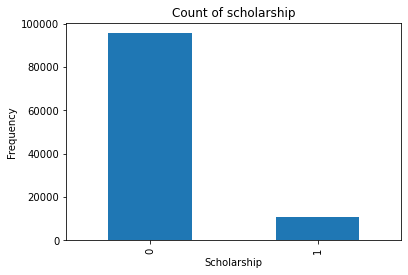

In [53]:
print(df['Scholarship'].value_counts())

df['Scholarship'].value_counts().plot(kind='bar', title="Count of scholarship", xlabel="Scholarship", ylabel="Frequency");

#### filtering based on scholarship

In [54]:
scholarship_yes = df.query('Scholarship==1')

scholarship_no = df.query('Scholarship==0')

In [55]:
print("counts of patients enrolled in Brasillan welfare program is {}".format(scholarship_yes.shape[0]))

print("counts of patients not enrolled in Brasillan welfare program is {}".format(scholarship_no.shape[0]))

num_samples = df.shape[0]

print(num_samples == scholarship_yes.shape[0] + scholarship_no.shape[0])

counts of patients enrolled in Brasillan welfare program is 10749
counts of patients not enrolled in Brasillan welfare program is 95612
True


#### Further analyzing patients enrolled in Brasillan welfare program and patients not enrolled

No     8200
Yes    2549
Name: No_show, dtype: int64


<AxesSubplot:title={'center':'Scholarship awarded by No_show appointment'}, xlabel='No_show appointment', ylabel='Frequency'>

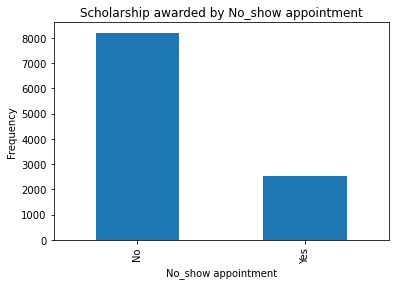

In [56]:
# Counts of patients with scholarship and appointment status
print(scholarship_yes['No_show'].value_counts())

scholarship_yes['No_show'].value_counts().plot(kind='bar', title="Scholarship awarded by No_show appointment", 
                                               xlabel="No_show appointment", ylabel='Frequency')

#### A total of 8245 out of 10801 patients enrolled in Brasillan welfare programs showed up for their appointments.

No     76699
Yes    18913
Name: No_show, dtype: int64


<AxesSubplot:title={'center':'Non scholarship recipient by No_show appointment'}, xlabel='No_show appointment', ylabel='Frequency'>

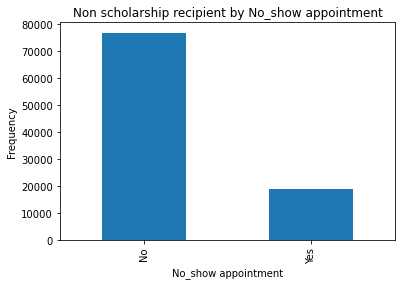

In [57]:
# Count of patients without scholarship and appointment status
print(scholarship_no['No_show'].value_counts())

scholarship_no['No_show'].value_counts().plot(kind='bar', title="Non scholarship recipient by No_show appointment", 
                                              xlabel="No_show appointment", ylabel='Frequency')

### Visualizing correlation beween the features

#### Using heatmap to visualize the correlation

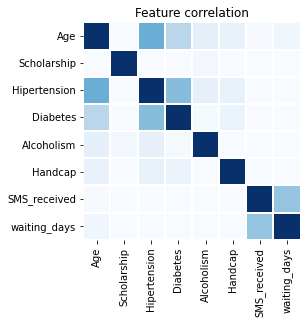

In [58]:
 corr = df.corr()

ax = sns.heatmap(corr, cbar=0, linewidths=2, vmax=1, vmin=0, square=True, cmap='Blues')
ax.set_title('Feature correlation')
plt.show()

#### The above heatmap shows the correlation of features. Hypertension and age, Diabetes and hypertension, waiting_days[elapsed days between schedulling and appointment date] and sms_received are highly positively correlated. WHILE Age and scholarship shows a negative correlation

### Conclusion

Analyzing the dataset, I addressed a few issues like renaming columns to make them conform to standard, dropping the wrong data and unwanted columns. I also added new columns from existing ones.
 
#### Here are some insights uncovered:
 
--The scheduling of appointments began on 2015-11-10 and ended on 2016-06-08.
 
--Appointments for visits began on 2016-04-29 and ended on 2016-06-08.
 
--Children and youth account for the majority of people enrolled in Brasillan welfare programs (scholarships).
 
--On average, Old people have the highest hypertension and diabetes, while adults have the highest alcoholism.
 
--79.9% of patients show up to the doctor's appointment, while 20.1% did not 
 
--Among the 20.1% who failed to attend, Child and Youth had the highest rate. This may be because hypertension, diabetes, and alcoholism are rare among them. WHILE
 
--Based on 79.9% of patients that showed up, Old, Adult always showed up the most because they often had hypertension, diabetes, and alcoholism
 
--In total, 37,072 patients scheduled appointments on the same day, 1726 did not show up, representing approximately 5% of the total.
 
--In general, the longer the waiting days, the greater the possibility of patients not showing up
 
--Out of 35,482 patients that received SMS, 25,698 showed up for the appointment. This implies that sending SMS to patients for reminders will prompt their show up
 
### Limitations

##### The dataset contains incorrect data, such as patients under the age of 0 and those with negative waiting days values. This could be a result of data entry errors.
 
##### Further information, such as type of appointment (routine check-up, specialist visit, lab test), brief medical history, will benefit our analysis.
 
 
### In conclusion:
 
A regular SMS should be sent to the patients regarding their appointment date.
 
A patient's appointment date should be scheduled within a short time period, as long waiting days would result in the patient not showing up later.
 
There should be more patients enrolled in the Brasillan welfare program.


In [59]:
#jupyter nbconvert --to webpdf Investigate_a_Dataset(no_show_appointment).ipynb

In [60]:
#pip install nbconvert[webpdf]